In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency

In [3]:
df = pd.read_csv('aug_train.csv')

df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


## Exploratory Data Analitycs(EDA)

### Descriptive statistics

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [5]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [8]:
df.shape

(19158, 14)

In [9]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

**Kesimpulan**

1. Dataframe berisi 19158baris dan 14kolom
2. Tipe data semua kolom sudah sesuai
3. Tidak ada data yang duplikat
4. Penulisan nama kolom tidak ada yang aneh
5. Ada nilai kosong pada kolom gender, enrolled_university, education_level, major_discipline,experience, company_size, company_type, training_hours

### Univariate analysis

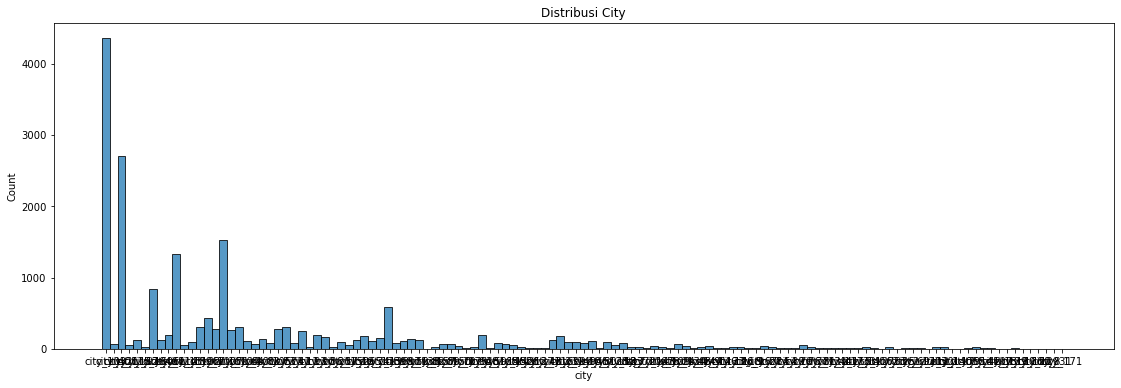

In [14]:
plt.figure(figsize=(19,6))
plt.title('Distribusi City')
sns.histplot(x=df['city'])
plt.show()

Distribusi pada kolom city positively skewed

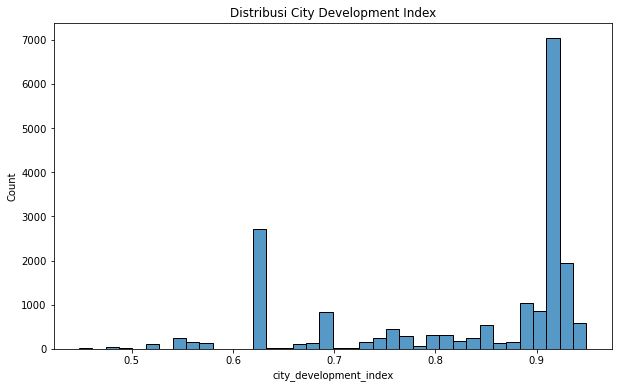

In [17]:
plt.figure(figsize=(10,6))
plt.title('Distribusi City Development Index')
sns.histplot(x=df['city_development_index'])
plt.show()

Distribusi pada kolom city bimodal

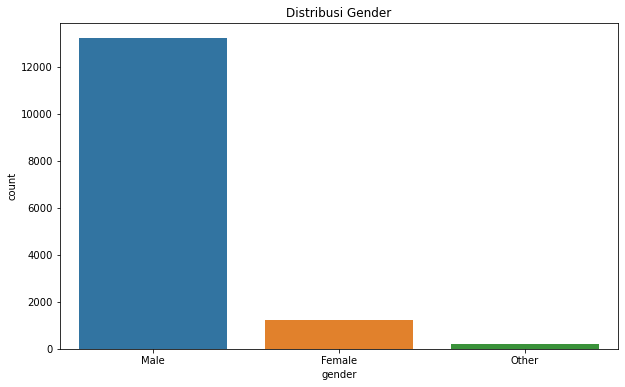

In [166]:
plt.figure(figsize=(10,6))
plt.title('Distribusi Gender')
sns.countplot(x=df['gender'])
plt.show()

Pada kolom gender distribusi paling tinggi adalah male

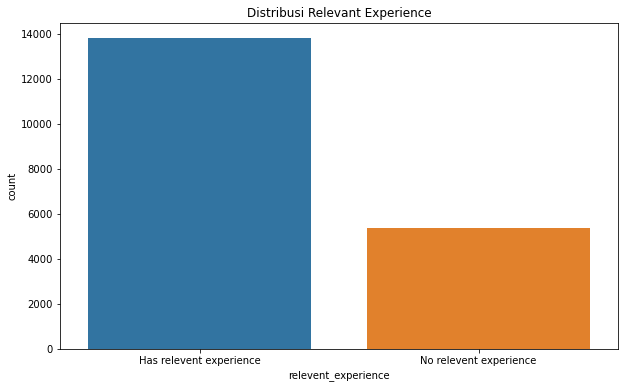

In [27]:
plt.figure(figsize=(10,6))
plt.title('Distribusi Relevant Experience')
sns.countplot(x=df['relevent_experience'])
plt.show()

Pada kolom relevent_experience distribusi paling tinggi adalah has relevant experience

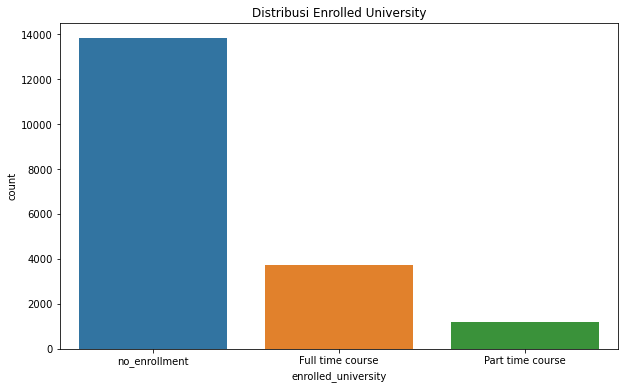

In [29]:
plt.figure(figsize=(10,6))
plt.title('Distribusi Enrolled University')
sns.countplot(x=df['enrolled_university'])
plt.show()

Pada kolom enrolled_university distribusi paling tinggi adalah no_enrollment

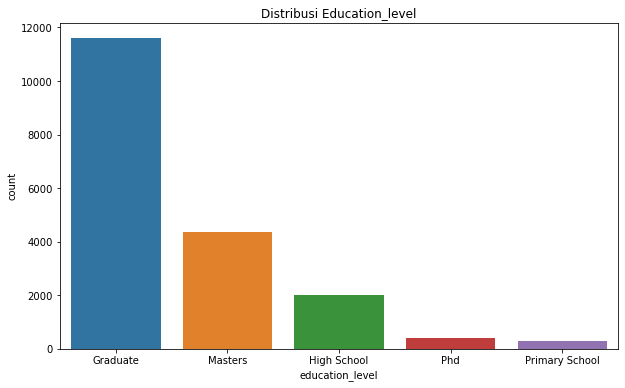

In [32]:
plt.figure(figsize=(10,6))
plt.title('Distribusi Education_level')
sns.countplot(x=df['education_level'])
plt.show()

Pada kolom education_level distribusi paling tinggi adalah Graduate

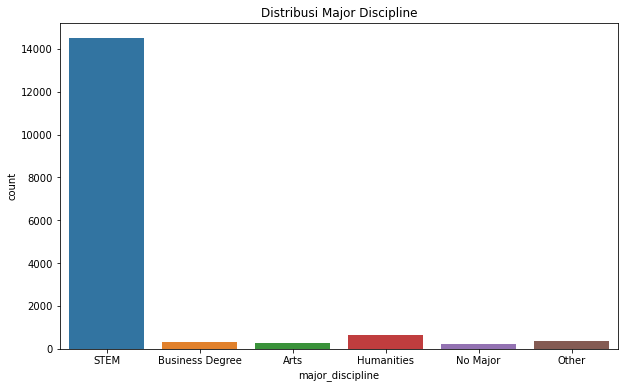

In [33]:
plt.figure(figsize=(10,6))
plt.title('Distribusi Major Discipline')
sns.countplot(x=df['major_discipline'])
plt.show()

Pada kolom major_discipline distribusi yang paling tinggi adalah STEM

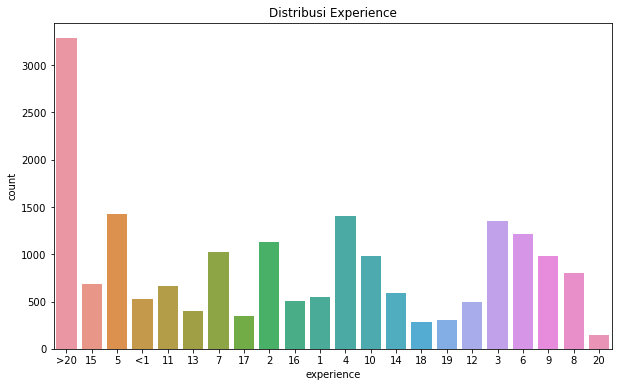

In [34]:
plt.figure(figsize=(10,6))
plt.title('Distribusi Experience')
sns.countplot(x=df['experience'])
plt.show()

Pada kolom experience distribusi paling banyak adalah >20

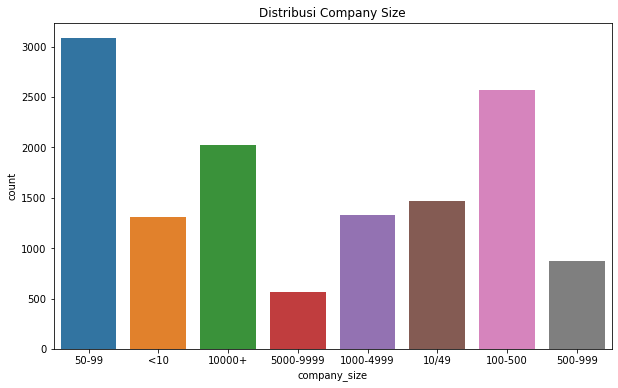

In [35]:
plt.figure(figsize=(10,6))
plt.title('Distribusi Company Size')
sns.countplot(x=df['company_size'])
plt.show()

Pada kolom company_size distribusi paling tinggi adalah 50-99

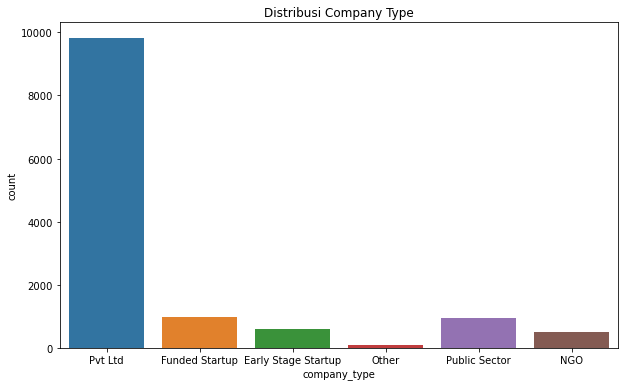

In [36]:
plt.figure(figsize=(10,6))
plt.title('Distribusi Company Type')
sns.countplot(x=df['company_type'])
plt.show()

Pada kolom company_type distribusi paling tinggi adalah Pvt Ltd

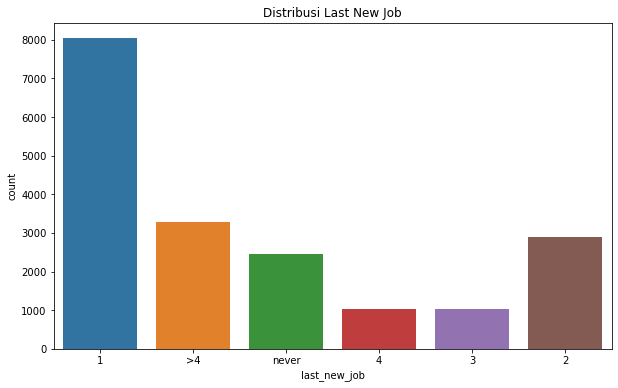

In [39]:
plt.figure(figsize=(10,6))
plt.title('Distribusi Last New Job')
sns.countplot(x=df['last_new_job'])
plt.show()

Pada kolom last_new_job distribusi paling tinggi adalah 1

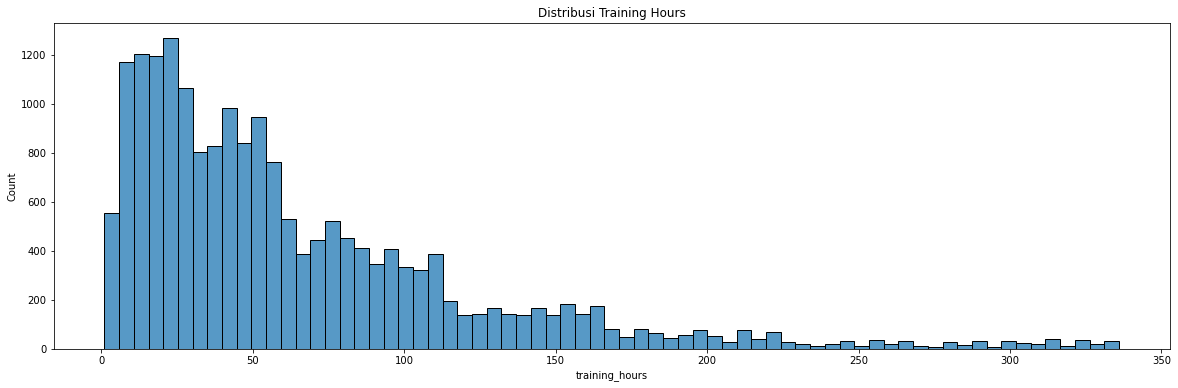

In [42]:
plt.figure(figsize=(20,6))
plt.title('Distribusi Training Hours')
sns.histplot(x=df['training_hours'])
plt.show()

Pada kolom training_hours distribusinya cenderung positively skewed

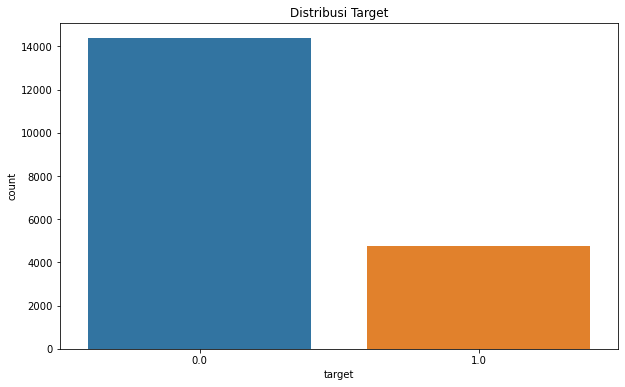

In [45]:
plt.figure(figsize=(10,6))
plt.title('Distribusi Target')
sns.countplot(x=df['target'])
plt.show()

Pada kolom target distribusi yang paling tinggi adalah 0

yang harus di follow up saat data processing adalah mengelompokan kolom experience dan menangani nilai other pada kolom gender

### Multivariate analysis

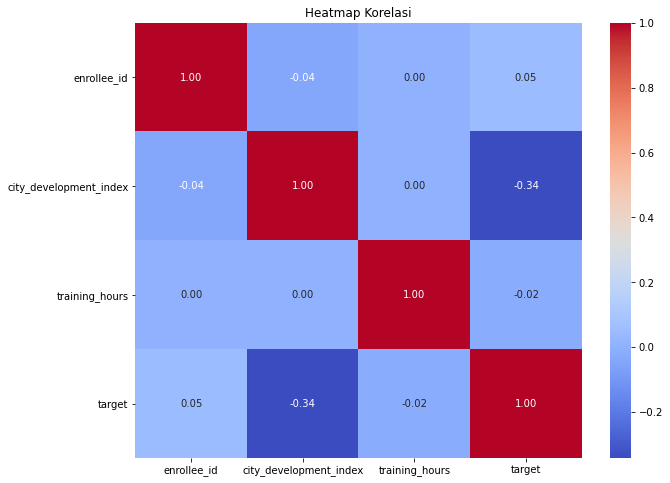

In [46]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi")
plt.show()

city_development_index memiliki korelasi negatif kuat sedangkan training_hours memiliki korelasi negatif lemah terhadap target(label)

In [55]:
df.sample()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
14546,5187,city_99,0.915,Male,No relevent experience,no_enrollment,Graduate,STEM,>20,10/49,Pvt Ltd,2,19,0.0


In [127]:
for column in df.select_dtypes(include=['object']):
    
    contingency_table = pd.crosstab(df['target'], df[column])

    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print(f"{column}:")
    print(f"Uji Chi-Square: {chi2:}")
    print('=====================')

city:
Uji Chi-Square: 2998.7772290703606
gender:
Uji Chi-Square: 9.0421817403733
relevent_experience:
Uji Chi-Square: 315.33857672021657
enrolled_university:
Uji Chi-Square: 455.166762018575
education_level:
Uji Chi-Square: 165.65538908719
major_discipline:
Uji Chi-Square: 12.207121063439173
experience:
Uji Chi-Square: 701.5739628056696
company_size:
Uji Chi-Square: 45.53175529315902
company_type:
Uji Chi-Square: 35.03547546070746
last_new_job:
Uji Chi-Square: 132.49948396906083


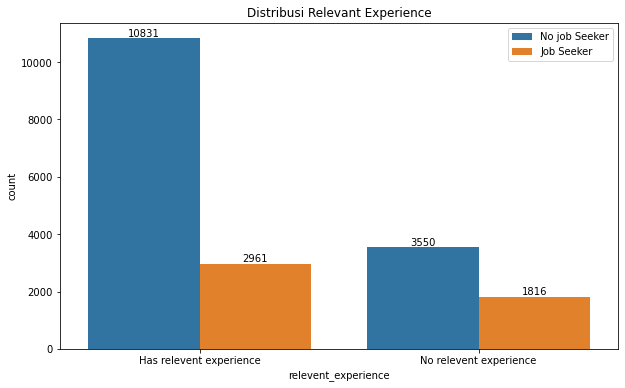

In [158]:
plt.figure(figsize=(10,6))
plt.title('Distribusi Relevant Experience')
ax = sns.countplot(x=df['relevent_experience'],hue=df['target'])
ax.legend(labels=['No job Seeker','Job Seeker'])
for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() + i.get_width() / 2, i.get_height()), ha='center', va='bottom')
plt.show()

In [152]:
df_relevant_experience = df.pivot_table(index='relevent_experience',columns='target',values='city',aggfunc='count').reset_index()

df_relevant_experience

target,relevent_experience,0.0,1.0
0,Has relevent experience,10831,2961
1,No relevent experience,3550,1816


In [151]:
df_relevant_experience['persentase'] = df_relevant_experience[1] / (df_relevant_experience[0] + df_relevant_experience[1]) * 100
df_relevant_experience['persentase'] = np.around(df_relevant_experience['persentase'], decimals=2)

df_relevant_experience

target,relevent_experience,0.0,1.0,persentase
0,Has relevent experience,10831,2961,21.47
1,No relevent experience,3550,1816,33.84


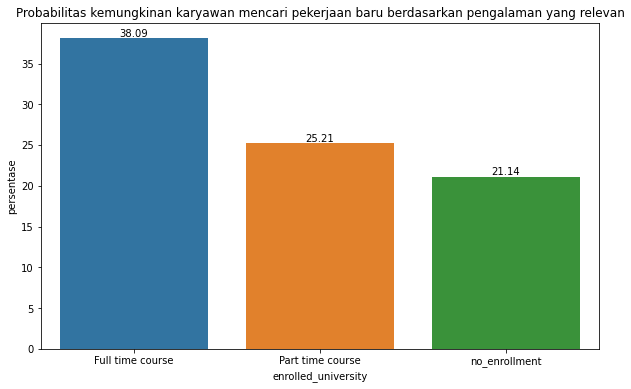

In [150]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=df_relevant_experience, x='relevent_experience', y='persentase')
for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() + i.get_width() / 2, i.get_height()), ha='center', va='bottom')
plt.title('Probabilitas kemungkinan karyawan mencari pekerjaan baru berdasarkan pengalaman yang relevan')
plt.show()

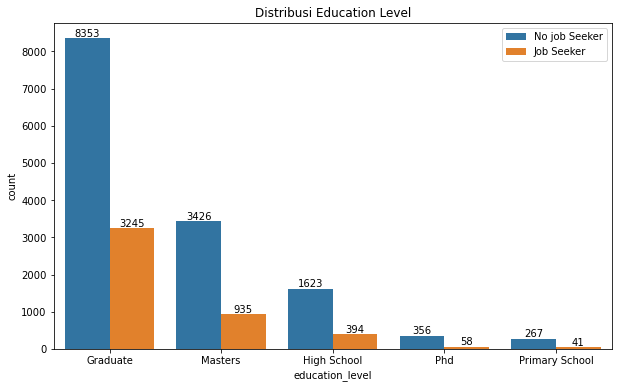

In [159]:
plt.figure(figsize=(10,6))
plt.title('Distribusi Education Level')
ax = sns.countplot(x=df['education_level'],hue=df['target'])
ax.legend(labels=['No job Seeker','Job Seeker'])
for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() + i.get_width() / 2, i.get_height()), ha='center', va='bottom')
plt.show()

In [143]:
df_education = df.pivot_table(index='education_level',columns='target',values='city',aggfunc='count').reset_index()

df_education

target,education_level,0.0,1.0
0,Graduate,8353,3245
1,High School,1623,394
2,Masters,3426,935
3,Phd,356,58
4,Primary School,267,41


In [144]:
df_education['persentase'] = df_education[1] / (df_education[0] + df_education[1]) * 100
df_education['persentase'] = np.around(df_education['persentase'], decimals=2)

df_education

target,education_level,0.0,1.0,persentase
0,Graduate,8353,3245,27.98
1,High School,1623,394,19.53
2,Masters,3426,935,21.44
3,Phd,356,58,14.01
4,Primary School,267,41,13.31


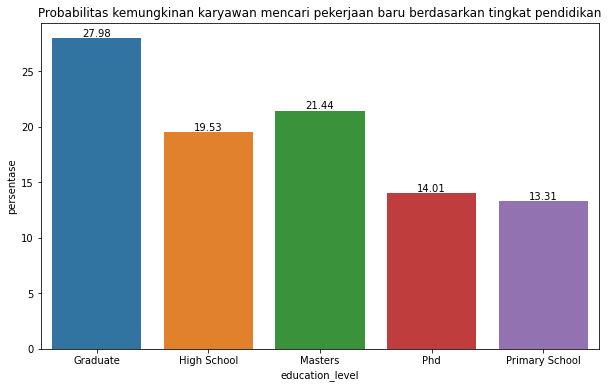

In [145]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=df_education, x='education_level', y='persentase')
for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() + i.get_width() / 2, i.get_height()), ha='center', va='bottom')
plt.title('Probabilitas kemungkinan karyawan mencari pekerjaan baru berdasarkan tingkat pendidikan')
plt.show()

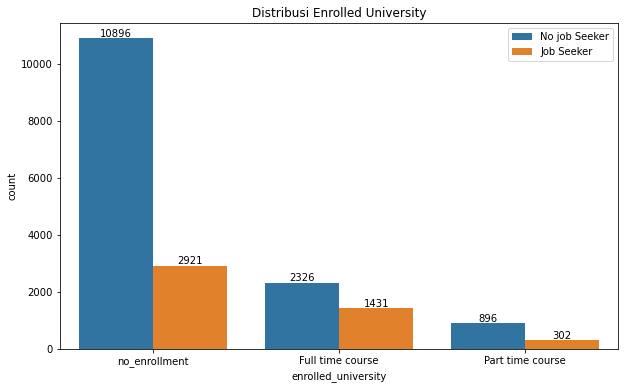

In [160]:
plt.figure(figsize=(10,6))
plt.title('Distribusi Enrolled University')
ax = sns.countplot(x=df['enrolled_university'],hue=df['target'])
ax.legend(labels=['No job Seeker','Job Seeker'])
for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() + i.get_width() / 2, i.get_height()), ha='center', va='bottom')
plt.show()

In [155]:
df_university = df.pivot_table(index='enrolled_university',columns='target', values='city', aggfunc='count').reset_index()

df_university

target,enrolled_university,0.0,1.0
0,Full time course,2326,1431
1,Part time course,896,302
2,no_enrollment,10896,2921


In [156]:
df_university['persentase'] = df_university[1] / (df_university[0] + df_university[1]) * 100
df_university['persentase'] = np.around(df_university['persentase'], decimals=2)

df_university

target,enrolled_university,0.0,1.0,persentase
0,Full time course,2326,1431,38.09
1,Part time course,896,302,25.21
2,no_enrollment,10896,2921,21.14


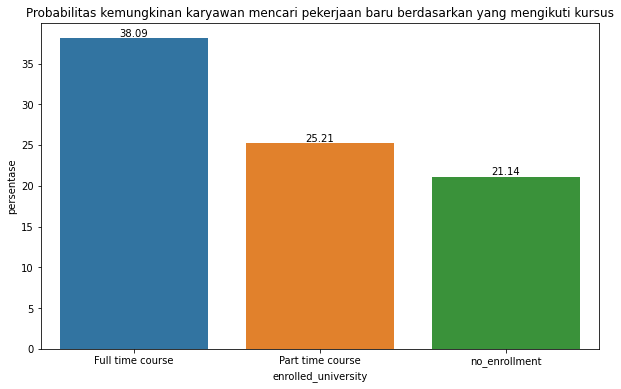

In [157]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=df_university, x='enrolled_university', y='persentase')
for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() + i.get_width() / 2, i.get_height()), ha='center', va='bottom')
plt.title('Probabilitas kemungkinan karyawan mencari pekerjaan baru berdasarkan yang mengikuti kursus')
plt.show()

a.Feature yang dipertahankan adalah enrolled_university, relevant_experience, education_level

b. Insight dari feature yang dipertahankan:
   * Karyawan yang mengikuti full time course memiliki peluang lebih besar untuk mendapatkan pekerjaan daripada orang yang mengikuti part time course atau tidak mengikuti kursus sama sekali
   * Karyawan yang memiliki pengalaman yang relevan memiliki peluang lebih besar untuk mendapatkan pekerjaan daripada orang yang tidak memiliki pengalaman yang relevan
   * Karyawan dengan tingkat pendidikan yang lebih tinggi memiliki peluang lebih besar untuk mendapatkan pekerjaan daripada orang dengan tingkat pendidikan yang lebih rendah

## Business Insight

* Perusahaan dapat memberikan kenaikan gaji atau promosi kepada karyawan yang memiliki pengalaman yang relevan dan tingkat pendidikan yang tinggi. Hal ini dapat membantu perusahaan untuk mempertahankan karyawan tersebut.
* Perusahaan dapat menciptakan budaya kerja yang positif dan suportif. Hal ini dapat membantu karyawan untuk merasa lebih puas dengan pekerjaannya dan mengurangi kemungkinan mereka untuk mencari pekerjaan baru.